# 1차원 입력 직선 모델

	 x =  [15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
	 t =  [170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


Text(0, 0.5, '$height$')

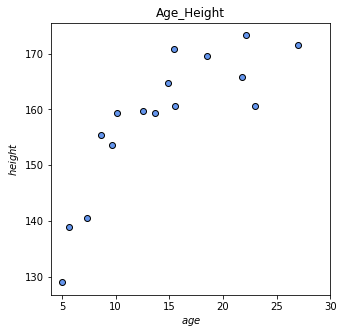

In [2]:
# 리스트 5-1-(1)
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성 --------------------------------
np.random.seed(seed=1) # 난수를 고정
X_min = 4                              #  X의 하한(표시 용)
X_max = 30                           # X의 상한(표시 용)
X_n = 16                                 # X의 상한(표시 용)
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2]     # 생성 매개 변수
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) + 4 * np.random.randn(X_n)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)
print("\t x = ",np.round(X,2))
print("\t t = ",np.round(T,2))

plt.figure(figsize=(5, 5))
plt.plot(X, T, marker='o', linestyle='None', markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.title("Age_Height")
plt.xlabel('$age$')
plt.ylabel('$height$')

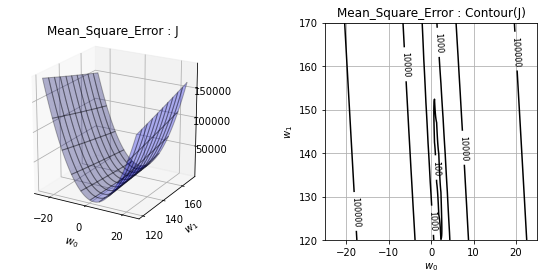

In [4]:
from mpl_toolkits.mplot3d import Axes3D
# 평균 오차 함수 ------------------------------
def mse_line(x, t, w):
    y = w[0] * x + w[1]
    mse = np.mean((y - t)**2)
    return mse

# 리스트 5-1-(1)
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성 --------------------------------
np.random.seed(seed=1) # 난수를 고정
X_min = 4      # X의 하한(표시 용)
X_max = 30   # X의 상한(표시 용)
X_n = 16         # X의 상한(표시 용)
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2] # 생성 매개 변수
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) \
+ 4 * np.random.randn(X_n) # (A)

# 계산 --------------------------------------
xn = 100 # 등고선 표시 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

# 표시 --------------------------------------
plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.title("Mean_Square_Error : J")
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, J, 30, colors='black',  levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.title("Mean_Square_Error : Contour(J)")
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')

plt.grid(True)
plt.show()

	 X =  [15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
	 T =  [170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


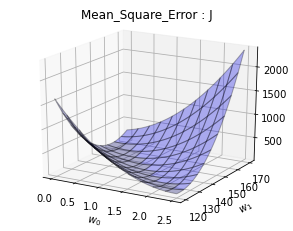

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(seed=1)
X_min = 4
X_max = 30
X_n = 16

X =  5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2]

T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) + 4 * np.random.randn(X_n)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)

print("\t X = ",np.round(X,2))
print("\t T = ",np.round(T,2))

def mse_line(x,t,w):
    y = w[0] * x + w[1];
    mse = np.mean((y-t)**2)
    return mse

xn = 100
w0_range = [0,2.5]
w1_range = [120,170]

w0 = np.linspace(w0_range[0], w0_range[1], xn)
w1 = np.linspace(w1_range[0], w1_range[1], xn)
ww0 ,ww1 = np.meshgrid(w0,w1)

J = np.zeros((len(w0),len(w1)))

for i0 in range(xn):
    for i1 in range(xn) :
        J[i1,i0] = mse_line(X,T,(w0[i0],w1[i1]))

plt.figure(figsize=(5,4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1,1,1, projection='3d')
ax.plot_surface(ww0, ww1, J, rstride=10, cstride=10, alpha=0.3,
                color='blue',edgecolor='black')
ax.set_xticks([0,0.5,1.0,1.5,2.0,2.5])
ax.set_yticks([120,130,140,150,160,170])

ax.view_init(20,-60)
plt.title("Mean_Square_Error : J")
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.grid(True)
plt.show()

반복 횟수 13820
W=[1.539947, 136.176160]
dMSE=[-0.005794, 0.099991]
MSE=49.027452


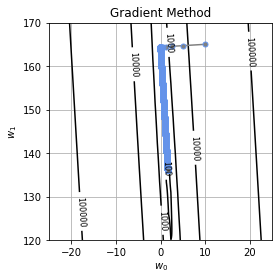

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def dmse_line(x, t, w):
    y = w[0] * x + w[1]
    d_w0 = 2 * np.mean((y - t) * x)
    d_w1 = 2 * np.mean(y - t)
    return d_w0, d_w1
# 구배법 ------------------------------------
def fit_line_num(x, t):
    w_init = [10.0, 165.0]     # 초기 매개 변수
    alpha = 0.001                   # 학습률
    i_max = 100000               # 반복의 최대 수
    eps = 0.1                            # 반복을 종료 기울기의 절대 값의 한계
    w_i = np.zeros([i_max, 2])
    w_i[0, :] = w_init              # w_i의 첫행(0번째 행에  w_init값 대입)
    for i in range(1, i_max):
        dmse = dmse_line(x, t, w_i[i - 1])
        w_i[i, 0] = w_i[i - 1, 0] - alpha * dmse[0]
        w_i[i, 1] = w_i[i - 1, 1] - alpha * dmse[1]
        if max(np.absolute(dmse)) < eps:  # 종료판정, np.absolute는 절대치
            break
    w0 = w_i[i, 0]
    w1 = w_i[i, 1]
    w_i = w_i[:i, :] # if (i==100) → i의 첫행(0번째 행에  w_init값 대입), 1장 기본문법 ppt 자료 참조
    return w0, w1, dmse, w_i
# 메인 ------------------------------------
plt.figure(figsize=(4, 4)) # MSE의 등고선 표시
xn = 100 # 등고선 해상도
w0_range = [-25, 25]
w1_range = [120, 170]

x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
cont = plt.contour(xx0, xx1, J, 30, colors='black',
                   levels=(100, 1000, 10000, 100000))
cont.clabel(fmt='%1.0f', fontsize=8) 
plt.grid(True)
# 구배법 호출
W0, W1, dMSE, W_history = fit_line_num(X, T) # fit_line_num의 리턴값인 w0, w1, dmse, w_i가 W0,W1,dMSE, W_hisory변수값으로 전달
# 결과보기
print('반복 횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-',
         color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.title("Gradient Method")
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.show()

w0=1.540, w1=136.176
SD=7.002 cm


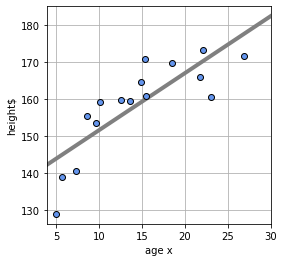

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# 리스트 5-1-(10)
# 선 표시 ----------------------------------
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)

# 메인 ------------------------------------
plt.figure(figsize=(4, 4))
W=np.array([W0, W1])
mse = mse_line(X, T, W)
print("w0={0:.3f}, w1={1:.3f}".format(W0, W1))
# mse = mse_line(X, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
show_line(W) 
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black') 
plt.xlim(X_min, X_max)
plt.xlabel('age x')
plt.ylabel('height$')
plt.grid(True)
plt.show()

# 2차원 입력면 모델

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


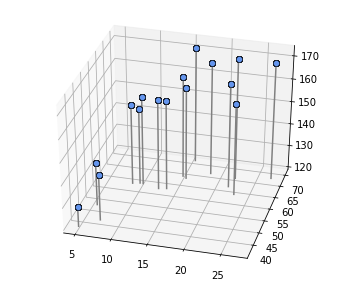

In [10]:
# 리스트 5-1-(12)
# 2차원 데이터 생성 --------------------------
X0 = X
X0_min = 5
X0_max = 30
np.random.seed(seed=1) # 난수를 고정
X1 = 23 * (T / 100)**2 + 2 * np.random.randn(X_n)
X1_min = 40
X1_max = 75

# 리스트 5-1-(13)
print(np.round(X0, 2))
print(np.round(X1, 2))
print(np.round(T, 2))
# 리스트 5-1-(14)

# 2차원 데이터의 표시 ------------------------
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]],
                [120, t[i]], color='gray')
        ax.plot(x0, x1, t, 'o',
                color='cornflowerblue', markeredgecolor='black',
                markersize=6, markeredgewidth=0.5)
        ax.view_init(elev=35, azim=-75)


# 메인 ------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1,1,1,projection='3d')
show_data2(ax, X0, X1, T)
plt.show()

SD=12.876 cm


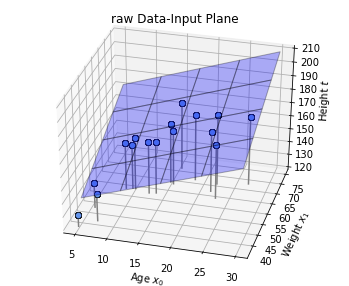

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# 리스트 5-1-(15)
#면의 표시 ----------------------------------
def show_plane(ax, w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    px0, px1 = np.meshgrid(px0, px1)
    y = w[0]*px0 + w[1] * px1 + w[2]
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3,color='blue', edgecolor='black') 

#면의 MSE -----------------------------------
def mse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 + w[2] # (A)
    mse = np.mean((y - t)**2)
    return mse

# 메인 ------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = [1.5, 1, 90]
show_plane(ax, W) 
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.title("raw Data-Input Plane")
ax.set_xlabel('Age $x_0$')
ax.set_ylabel('Weight $x_1$')
ax.set_zlabel('Height $t$')
plt.show()

w0=0.5, w1=1.1, w2=89.0
SD=2.546 cm


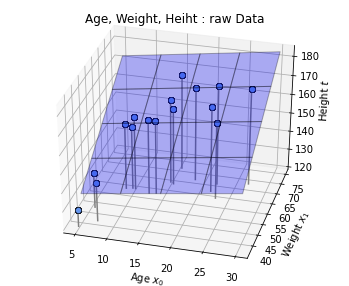

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# 리스트 5-1-(16)
# 해석해 ------------------------------------
def fit_plane(x0, x1, t):
    c_tx0 = np.mean(t * x0) - np.mean(t) * np.mean(x0)
    c_tx1 = np.mean(t * x1) - np.mean(t) * np.mean(x1)
    c_x0x1 = np.mean(x0 * x1) - np.mean(x0) * np.mean(x1)
    v_x0 = np.var(x0)
    v_x1 = np.var(x1)
    w0 = (c_tx1 * c_x0x1 - v_x1 * c_tx0) / (c_x0x1**2 - v_x0 * v_x1)
    w1 = (c_tx0 * c_x0x1 - v_x0 * c_tx1) / (c_x0x1**2 - v_x0 * v_x1)
    w2 = -w0 * np.mean(x0) - w1 * np.mean(x1) + np.mean(t)
    return np.array([w0, w1, w2]) 
# 메인 ------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = fit_plane(X0, X1, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.title("Age, Weight, Heiht : raw Data")
ax.set_xlabel('Age $x_0$')
ax.set_ylabel('Weight $x_1$')
ax.set_zlabel('Height $t$')
plt.show()